In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['alligator','alpaca','antelope','badger','bat','bear','bee','beetle','bison','boar','Brown-Headed Barbet','Buffalo','butterfly','cat','caterpillar','Cattle Egret','chicken','chimpanzee','cockroach','Common Kingfisher','Common Myna','Common Rosefinch','Common Tailorbird','Coppersmith Barbet','cow','coyote','crab','crocodile','crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','Forest Wagtail','fox','gharial','goat','goldfish','goose','gorilla','grasshopper','Gray Wagtail','Green Bee-Eater','hamster','hare','hedgehog','hippopotamus','Hoopoe','hornbill','horse','House Crow','hummingbird','hyena','Indian Grey Hornbill','Indian Pitta','Indian Roller','jellyfish','Jungle Babbler','kangaroo','koala','ladybugs','leopard','lion','lizard','lobster','mosquito','moth','mouse','Northern Lapwing','octopus','okapi','orangutan','otter','owl','ox','panda','pangolin','parrot','Peacock','pelecaniformes','penguin','pig','pigeon','porcupine','possum','Python','raccoon','Red-Wattled Lapwing','reindeer','Rhino','Ruddy Shelduck','Rufous Treepie','Russell\'s Viper','sandpiper','Sarus Crane','seahorse','seal','shark','sheep','sparrow','spider','squid','squirrel','starfish','swan','tiger','turkey','turtle','whale','White Wagtail','White-Breasted Kingfisher','White-Breasted Waterhen','wolf','wombat','woodpecker','zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    datasets = ['training_set', 'test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                try:
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                    image = cv2.resize(image, IMAGE_SIZE) 

                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading training_set


100%|███████████████████████████████████████████████████████████████████████████████| 509/509 [00:00<00:00, 640.93it/s]


100%|█████████████████████████████████████████████████████████████████████████████| 1074/1074 [00:01<00:00, 688.32it/s]


Loading test_set


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 290.32it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 98.49it/s]


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [7]:
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='elu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='elu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='elu', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.1),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='tanh', strides=2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='sigmoid', strides=2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Flatten(),
    Dropout(0.5),
    Dense(122, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=1000)

Epoch 1/1000
504/504 [==============================] - 19s 20ms/step - loss: 3.8596 - accuracy: 0.0970
Epoch 2/1000
504/504 [==============================] - 9s 19ms/step - loss: 3.4458 - accuracy: 0.1393
Epoch 3/1000
504/504 [==============================] - 9s 19ms/step - loss: 3.2363 - accuracy: 0.1907
Epoch 4/1000
504/504 [==============================] - 9s 19ms/step - loss: 3.0669 - accuracy: 0.2487
Epoch 5/1000
504/504 [==============================] - 9s 19ms/step - loss: 2.9364 - accuracy: 0.2844
Epoch 6/1000
504/504 [==============================] - 9s 19ms/step - loss: 2.8456 - accuracy: 0.3000
Epoch 7/1000
504/504 [==============================] - 9s 19ms/step - loss: 2.7508 - accuracy: 0.3224
Epoch 8/1000
504/504 [==============================] - 9s 19ms/step - loss: 2.6805 - accuracy: 0.3361
Epoch 9/1000
504/504 [==============================] - 9s 19ms/step - loss: 2.6546 - accuracy: 0.3408
Epoch 10/1000
504/504 [==============================] - 9s 19ms/step - 

504/504 [==============================] - 10s 20ms/step - loss: 1.6665 - accuracy: 0.5828
Epoch 80/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.7332 - accuracy: 0.5669
Epoch 81/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6540 - accuracy: 0.5851
Epoch 82/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6979 - accuracy: 0.5763
Epoch 83/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6657 - accuracy: 0.5821
Epoch 84/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6505 - accuracy: 0.5872
Epoch 85/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6380 - accuracy: 0.5894
Epoch 86/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6340 - accuracy: 0.5922
Epoch 87/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6392 - accuracy: 0.5868
Epoch 88/1000
504/504 [==============================] - 10s 20ms/ste

504/504 [==============================] - 10s 19ms/step - loss: 1.6242 - accuracy: 0.5941
Epoch 157/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.6270 - accuracy: 0.5927
Epoch 158/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.6324 - accuracy: 0.5911
Epoch 159/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.6501 - accuracy: 0.5873
Epoch 160/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.6363 - accuracy: 0.5898
Epoch 161/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.6450 - accuracy: 0.5872
Epoch 162/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.6369 - accuracy: 0.5912
Epoch 163/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.6761 - accuracy: 0.5832
Epoch 164/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.6501 - accuracy: 0.5879
Epoch 165/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 20ms/step - loss: 1.7078 - accuracy: 0.5727
Epoch 234/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6802 - accuracy: 0.5789
Epoch 235/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6732 - accuracy: 0.5801
Epoch 236/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6971 - accuracy: 0.5752
Epoch 237/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6914 - accuracy: 0.5775
Epoch 238/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.6898 - accuracy: 0.5783
Epoch 239/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.7502 - accuracy: 0.5645
Epoch 240/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.7000 - accuracy: 0.5761
Epoch 241/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.7099 - accuracy: 0.5727
Epoch 242/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 20ms/step - loss: 1.7891 - accuracy: 0.5544
Epoch 311/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.8214 - accuracy: 0.5489
Epoch 312/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.7988 - accuracy: 0.5551
Epoch 313/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.7945 - accuracy: 0.5529
Epoch 314/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.7771 - accuracy: 0.5587
Epoch 315/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.7818 - accuracy: 0.5580
Epoch 316/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.8025 - accuracy: 0.5551
Epoch 317/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.7575 - accuracy: 0.5606
Epoch 318/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1602 - accuracy: 0.4805
Epoch 319/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 20ms/step - loss: 1.8643 - accuracy: 0.5383
Epoch 388/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.8389 - accuracy: 0.5416
Epoch 389/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.8458 - accuracy: 0.5421
Epoch 390/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.8558 - accuracy: 0.5384
Epoch 391/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9019 - accuracy: 0.5332
Epoch 392/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.8173 - accuracy: 0.5484
Epoch 393/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.8472 - accuracy: 0.5412
Epoch 394/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.8442 - accuracy: 0.5439
Epoch 395/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.8673 - accuracy: 0.5349
Epoch 396/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 20ms/step - loss: 1.9349 - accuracy: 0.5226
Epoch 465/1000
504/504 [==============================] - 10s 19ms/step - loss: 1.9157 - accuracy: 0.5262
Epoch 466/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9358 - accuracy: 0.5201
Epoch 467/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9183 - accuracy: 0.5260
Epoch 468/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.8935 - accuracy: 0.5307
Epoch 469/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9056 - accuracy: 0.5289
Epoch 470/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9753 - accuracy: 0.5111
Epoch 471/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9240 - accuracy: 0.5243
Epoch 472/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9144 - accuracy: 0.5270
Epoch 473/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 20ms/step - loss: 2.0090 - accuracy: 0.5048
Epoch 542/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0087 - accuracy: 0.5013
Epoch 543/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1258 - accuracy: 0.4798
Epoch 544/1000
504/504 [==============================] - 10s 19ms/step - loss: 2.0370 - accuracy: 0.4991
Epoch 545/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0194 - accuracy: 0.5018
Epoch 546/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0048 - accuracy: 0.5049
Epoch 547/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0244 - accuracy: 0.5001
Epoch 548/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9835 - accuracy: 0.5087
Epoch 549/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0001 - accuracy: 0.5049
Epoch 550/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 20ms/step - loss: 2.1856 - accuracy: 0.4667
Epoch 619/1000
504/504 [==============================] - 10s 19ms/step - loss: 2.0315 - accuracy: 0.4958
Epoch 620/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0195 - accuracy: 0.5003
Epoch 621/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9993 - accuracy: 0.5027
Epoch 622/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9939 - accuracy: 0.5054
Epoch 623/1000
504/504 [==============================] - 10s 20ms/step - loss: 1.9858 - accuracy: 0.5061
Epoch 624/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0774 - accuracy: 0.4898
Epoch 625/1000
504/504 [==============================] - 10s 19ms/step - loss: 2.0138 - accuracy: 0.5004
Epoch 626/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0073 - accuracy: 0.5042
Epoch 627/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 20ms/step - loss: 2.2297 - accuracy: 0.4549
Epoch 696/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.3151 - accuracy: 0.4370
Epoch 697/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1581 - accuracy: 0.4698
Epoch 698/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2371 - accuracy: 0.4528
Epoch 699/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1525 - accuracy: 0.4709
Epoch 700/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1886 - accuracy: 0.4684
Epoch 701/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0933 - accuracy: 0.4843
Epoch 702/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1005 - accuracy: 0.4839
Epoch 703/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.0580 - accuracy: 0.4932
Epoch 704/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 19ms/step - loss: 2.1694 - accuracy: 0.4657
Epoch 773/1000
504/504 [==============================] - 10s 19ms/step - loss: 2.2456 - accuracy: 0.4460
Epoch 774/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2577 - accuracy: 0.4425
Epoch 775/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2537 - accuracy: 0.4432
Epoch 776/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1516 - accuracy: 0.4675
Epoch 777/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2874 - accuracy: 0.4377
Epoch 778/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1944 - accuracy: 0.4613
Epoch 779/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1525 - accuracy: 0.4697
Epoch 780/1000
504/504 [==============================] - 10s 19ms/step - loss: 2.2445 - accuracy: 0.4481
Epoch 781/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 20ms/step - loss: 2.2032 - accuracy: 0.4589
Epoch 850/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1723 - accuracy: 0.4652
Epoch 851/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2171 - accuracy: 0.4557
Epoch 852/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2652 - accuracy: 0.4455
Epoch 853/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2218 - accuracy: 0.4556
Epoch 854/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1390 - accuracy: 0.4708
Epoch 855/1000
504/504 [==============================] - 10s 19ms/step - loss: 2.1568 - accuracy: 0.4704
Epoch 856/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.1665 - accuracy: 0.4651
Epoch 857/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2169 - accuracy: 0.4550
Epoch 858/1000
504/504 [==============================] - 10s

504/504 [==============================] - 10s 20ms/step - loss: 2.4748 - accuracy: 0.4011
Epoch 927/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.3683 - accuracy: 0.4229
Epoch 928/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.3261 - accuracy: 0.4315
Epoch 929/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.3039 - accuracy: 0.4365
Epoch 930/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.3352 - accuracy: 0.4300
Epoch 931/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.4079 - accuracy: 0.4129
Epoch 932/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2757 - accuracy: 0.4444
Epoch 933/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.3600 - accuracy: 0.4267
Epoch 934/1000
504/504 [==============================] - 10s 20ms/step - loss: 2.2552 - accuracy: 0.4483
Epoch 935/1000
504/504 [==============================] - 10s

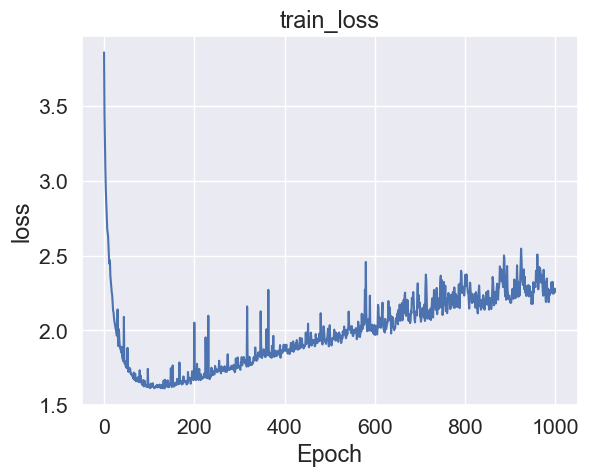

In [9]:
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])

In [10]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

22/22 [==============================] - 2s 6ms/step


In [11]:
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

0.30071942446043165


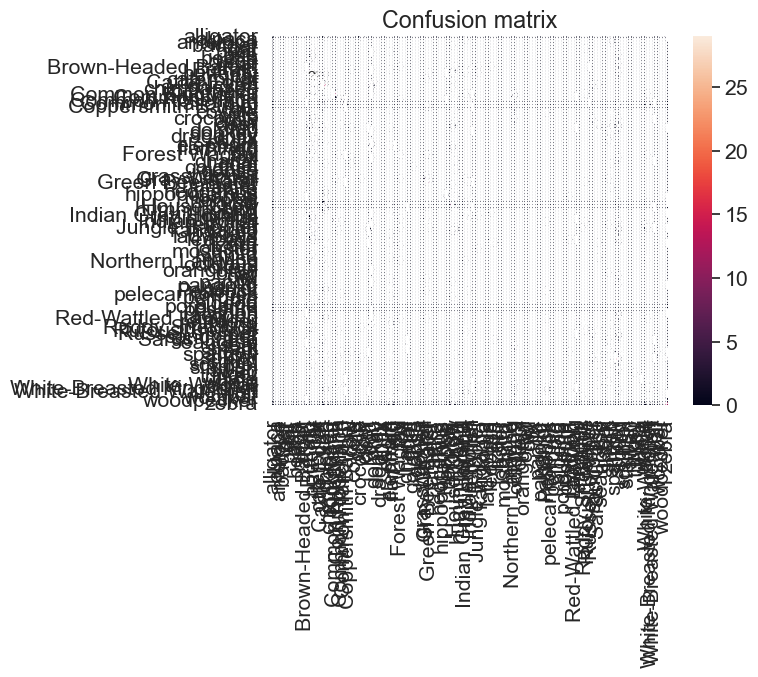

In [12]:
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [13]:
'存模型&讀模型'
from keras.models import load_model
model.save("31702-01_model")

INFO:tensorflow:Assets written to: 31702-01_model\assets


INFO:tensorflow:Assets written to: 31702-01_model\assets
